# Images with Significant Background

**Scott Prahl**

**May 2020, Version 3**

It is common to have images with significant background.  These images were all collected by students trying to do a $M^2$ experiment.

In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

import laserbeamsize as lbs

### First import the 16 images

In [2]:
# pixel size in mm for the camera
pixel_size_mm = 3.75/1000           

# array of distances at which images were collected
z2 = [200,300,400,420,470,490,500,520,540,550,570,590,600,650,700,800] #mm

# array of filenames associated with each image
fn2 = ["k-%dmm.png" % number for number in z2]

# read them all into memory 
test_img = [imageio.imread(fn) for fn in fn2]

### Find beam sizes for each image using default settings

The `lbs.beam_size()` algorithm works on most files without modification.

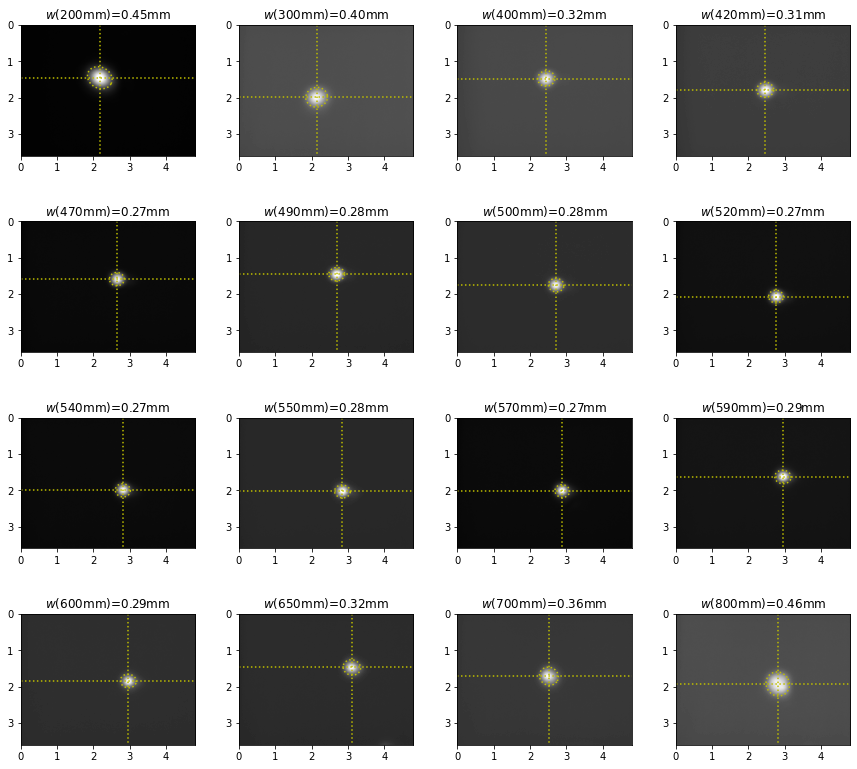

In [3]:
num  = len(z2)
rows = 4
cols = 4
f, axs = plt.subplots(rows,cols,figsize=(15,10))

for i in range(num):
    plt.subplot(rows,cols,i+1)

    # show the beam image with actual dimensions on the axes
    v,h=test_img[i].shape
    plt.imshow(test_img[i], extent=[0,h* pixel_size_mm,v* pixel_size_mm,0], cmap='gray')

    # find the beam center and show it
    xc, yc, dx, dy, phi = lbs.beam_size(test_img[i])
    plt.plot([xc* pixel_size_mm,xc* pixel_size_mm],[0,v* pixel_size_mm],':y')
    plt.plot([0,h* pixel_size_mm],[yc* pixel_size_mm,yc* pixel_size_mm],':y')

    # show ellipse around beam
    xp,yp = lbs.ellipse_arrays(xc,yc,dx,dy,phi)
    plt.plot(xp* pixel_size_mm,yp* pixel_size_mm,':y')

    plt.xlim(0,h* pixel_size_mm)
    plt.ylim(v* pixel_size_mm,0)

    # calculate 1/e^2 radius for symmetric beam to label image
    r=np.sqrt(dx**2+dy**2)/2*pixel_size_mm
    plt.title('$w$(%dmm)=%.2fmm'%(z2[i],r))

plt.subplots_adjust(bottom=0.0, top=1.0, hspace=0.5)
plt.show()